# Training Models

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

# Linear regression using the Normal Equation

Linear Regression Equation:

$$ \hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n$$

* in order to train a model we need to fit the function
* which means we need to set the parameters $ \theta_n $
* we need to find a value of $ \theta $ the minimizes the RMSE (or MSE)

The MSE of a Linear Regression hypothesis $ h_{\theta}$ on a training set $X$ is calculated using:

$$ MSE(X,h_{\theta}) = \frac{1}{m} \sum_{i=1}^m ( \theta^T \cdot x^i - y^i )^2$$

To find the value of $ \theta $ that minimizes the cost functino we use the *Normal Equation*:

$$ \hat{\theta} = ( X^T \cdot X)^{-1} \cdot X^T \cdot y $$

In the following we us the equation:

$$ y = 4+ 3 x_0 + noise$$

to fit our model:

In [3]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Saving figure generated_data_plot


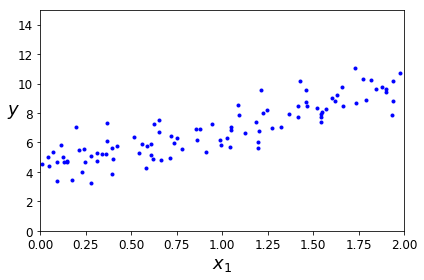

In [18]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

Using Numpy to build the *Normal Equation*:

In [19]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [20]:
theta_best

array([[4.21509616],
       [2.77011339]])

close enough!

We use `theta_best` to make predictions:

In [21]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

If we plot this prediction we'll get a linear fit of the data:

Saving figure linear_model_predictions


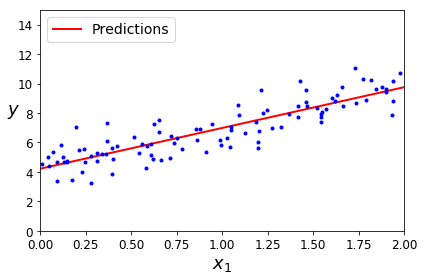

In [25]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
save_fig("linear_model_predictions")
plt.show()

Doing the equivalent with **sklearn** looks as follows:

In [26]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [27]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

q.e.d.

## Gradient Descent

